Refer to https://github.com/annisap/irs-mlp/blob/master/MLP-LearningCurves.ipynb

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def data_import(df):
    import_df = pd.read_csv(f'../Data/wildfires_{df}.txt', sep='\t')
    
    for column in import_df:
        try:
            import_df[column] = import_df[column].str.strip()
        except:
            pass
        return import_df
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [3]:
df_train = pd.DataFrame(data_import('training'))
#df.reset_index(inplace=True, drop=False)
df_test = pd.DataFrame(data_import('test'))

In [4]:
X_cols = ['year', 'temp', 'humidity', 'rainfall', 'drought_code','buildup_index',  'wind_speed']
y_col = ['fire']

X_train = df_train[X_cols]
y_train = df_train[y_col]

X_test = df_test[X_cols]
y_test = df_test[y_col]

In [5]:
#Encode Categorical variables with LabelEncoder
labelencoder = LabelEncoder()
df_train['fire'] = labelencoder.fit_transform(df_train["fire"])

fire = pd.DataFrame({'fire':['no', 'yes']})

In [6]:
"""
LabelEncoder introduced a new problem (noise) to our dataset: added numerical relationships in the features that now have become ordinal variables. 
That means that the model thinks that Iris-versicolor(1) is higher than Iris-setosa(0) and Iris-setosa(0) is smaller than Iris-virginica(2).
To solve that we would take a three dimensional vector, rather than an one dimensional vector with 3 values ([0,1,2])
"""
df_train = create_dummies(df_train, 'fire')

In [7]:
# Need to scale the data now - MLP(?) is sensitive to unnormalised data
unscaled_features = X_train

sc = StandardScaler()
#calculate μ & σ(fit) and apply the transformation(transform)
X_train_array = sc.fit_transform(X_train.values)
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
# Center test data with the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

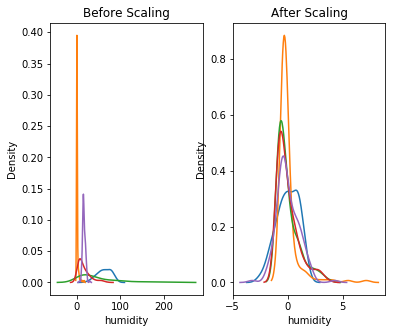

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled_features['humidity'], ax=ax1)
sns.kdeplot(unscaled_features['rainfall'], ax=ax1)
sns.kdeplot(unscaled_features['drought_code'], ax=ax1)
sns.kdeplot(unscaled_features['buildup_index'], ax=ax1)
sns.kdeplot(unscaled_features['wind_speed'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train['humidity'], ax=ax2)
sns.kdeplot(X_train['rainfall'], ax=ax2)
sns.kdeplot(X_train['drought_code'], ax=ax2)
sns.kdeplot(X_train['buildup_index'], ax=ax2)
sns.kdeplot(X_train['wind_speed'], ax=ax2)

plt.show()

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init= 0.01, max_iter=500)

In [10]:
mlp.fit(X_train, y_train)

C:\Users\phil-\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\phil-\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=500,
              solver='sgd')

In [11]:
mlp.score(X_test,y_test)

0.84

In [12]:
mlp.score(X_train, y_train)

0.9155844155844156